<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [2]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [3]:
ser = pd.Series(data = [100, 'foo', 300, 'bar', 500],index =  ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [6]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [17]:
#ser = pd.Series([data] , [index])



500

In [50]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [51]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [52]:
ser.iloc[2]
# iloc = index location

300

In [3]:
'bob' in ser

True

In [4]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [20]:
temp = ser * 2
temp , '\n' , ser
# only the data vaLues get doubled by the value multiplied

(tom         200
 bob      foofoo
 nancy       600
 dan      barbar
 eric       1000
 dtype: object, '\n', tom      100
 bob      foo
 nancy    300
 dan      bar
 eric     500
 dtype: object)

In [21]:
ser[['nancy', 'eric']] ** 2
# exponential applicable only on integer values 

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>


In [3]:
import pandas as pd
d = {'one' : pd.Series(data = [100., 200., 300.], index = ['apple', 'ball', 'clock']),
     'two' : pd.Series(data = [111., 222., 333., 4444.], index = ['apple', 'ball', 'cerill', 'dancy'])
    }
#print(d)

e = pd.DataFrame( {'three':pd.Series(data = [100 , 102 , 104 , 106] , index = ['a' , 'b' , 'c' , 'd']) ,
                   'four ' :pd.Series([200 , 202 , 204 , 206] , ['a' , 'b' , 'r' , 's'])
    
    }
                 
                )
e , 
(pd.DataFrame(d))

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [4]:

import pandas as pd

df = pd.DataFrame(d,columns =['two','one'])
df['four'] = df['two']*df['one']
df


,two,one,four
apple,111.0,100.0,11100.0
ball,222.0,200.0,44400.0
cerill,333.0,NaN,NaN
clock,NaN,300.0,NaN
dancy,4444.0,NaN,NaN


#### df.index

In [5]:
df.head(2)

,two,one,four
apple,111.0,100.0,11100.0
ball,222.0,200.0,44400.0


In [6]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [7]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'one'])

,two,one
dancy,4444.0,NaN
ball,222.0,200.0
apple,111.0,100.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [8]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [11]:
pd.DataFrame(data , index = [1,2] , columns= ['alex' , 'alice'] )

,alex,alice
1,1.0,NaN
2,NaN,20.0


In [12]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [13]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [14]:
df

,two,one,four
apple,111.0,100.0,11100.0
ball,222.0,200.0,44400.0
cerill,333.0,NaN,NaN
clock,NaN,300.0,NaN
dancy,4444.0,NaN,NaN


In [16]:
pd.DataFrame(df['one'])

,one
apple,100.0
ball,200.0
cerill,NaN
clock,300.0
dancy,NaN


In [17]:
df['three'] = df['one'] * df['two']
df

,two,one,four,three
apple,111.0,100.0,11100.0,11100.0
ball,222.0,200.0,44400.0,44400.0
cerill,333.0,NaN,NaN,NaN
clock,NaN,300.0,NaN,NaN
dancy,4444.0,NaN,NaN,NaN


In [20]:
df['flag'] = df['one'] > 250
#df['new'] = df
#if df['one'] > 250:
    #df['one']+=100
    
df

,two,one,four,three,flag
apple,111.0,100.0,11100.0,11100.0,False
ball,222.0,200.0,44400.0,44400.0,False
cerill,333.0,NaN,NaN,NaN,False
clock,NaN,300.0,NaN,NaN,True
dancy,4444.0,NaN,NaN,NaN,False


In [21]:
three = df.pop('three')

In [22]:
print (pd.Series(three))

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64


In [24]:
df

,two,one,four,flag
apple,111.0,100.0,11100.0,False
ball,222.0,200.0,44400.0,False
cerill,333.0,NaN,NaN,False
clock,NaN,300.0,NaN,True
dancy,4444.0,NaN,NaN,False


In [26]:
del df['two']

In [28]:
df

,one,copy,four,flag
apple,100.0,100.0,11100.0,False
ball,200.0,200.0,44400.0,False
cerill,NaN,NaN,NaN,False
clock,300.0,300.0,NaN,True
dancy,NaN,NaN,NaN,False


In [36]:
df.insert(2 , '',df['four'])
df

,one,copy,,four,,flag,one_upper_half
apple,100.0,100.0,11100.0,11100.0,11100.0,False,11100.0
ball,200.0,200.0,44400.0,44400.0,44400.0,False,44400.0
cerill,NaN,NaN,NaN,NaN,NaN,False,NaN
clock,300.0,300.0,NaN,NaN,NaN,True,NaN
dancy,NaN,NaN,NaN,NaN,NaN,False,NaN


In [37]:
df['one_upper_half'] = df['four'][:2]
df
#slicing of columns

,one,copy,,four,,flag,one_upper_half
apple,100.0,100.0,11100.0,11100.0,11100.0,False,11100.0
ball,200.0,200.0,44400.0,44400.0,44400.0,False,44400.0
cerill,NaN,NaN,NaN,NaN,NaN,False,NaN
clock,300.0,300.0,NaN,NaN,NaN,True,NaN
dancy,NaN,NaN,NaN,NaN,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [2]:
# Note: Adjust the name of the folder to match your local directory

!ls ./

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!cat ./movielens/movies.csv | wc -l

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!head -5 ./movielens/ratings.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [13]:
d = {"column1" : pd.Series( data = [111,222,333,444] , index = ["ab" ,"cd" , "ef" , "ij"]),
     "column2" : pd.Series( data = [4567,32,0.00] , index = ["ab" , "ij" , "flash"])
        }
print(d)

df = pd.DataFrame(d)
df


{'column1': ab    111
cd    222
ef    333
ij    444
dtype: int64, 'column2': ab       4567.0
ij         32.0
flash       0.0
dtype: float64}


,column1,column2
ab,111.0,4567.0
cd,222.0,NaN
ef,333.0,NaN
flash,NaN,0.0
ij,444.0,32.0


In [8]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
import pandas as pd
tags = pd.read_csv('./movielens/tags.csv')
tags.head(10)



#tags_1 = pd.read_csv('./movielens/tags.csv')

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [10]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
#ratings.head(10)
rat = pd.read_csv('./movielens/ratings.csv')
rat.head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [11]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [26]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[1]
type(row_0)

pandas.core.series.Series

In [27]:
row_0

userId            65
movieId          208
tag        dark hero
Name: 1, dtype: object

In [28]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [29]:
row_0['userId']
#since as a dict

65

In [30]:
'TIMESTAMP' in row_0

False

In [36]:
row_0.movieId

208

In [37]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [38]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [39]:
row_0 = tags.iloc[3]
print(row_0.name)
tags.index

3


RangeIndex(start=0, stop=465564, step=1)

In [20]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [16]:
# Extract row 0, 11, 2000 from DataFrame

row = tags.iloc[ [0,11,2000] ]
#print(row.index)
row

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [42]:

ratings['rating'].describe()


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [2]:
import pandas as pd
ratings = pd.read_csv('./movielens/ratings.csv')
(ratings.head(10))
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [2]:
ratings['timestamp'].mean()

1100917921.6770184

In [6]:
ratings['timestamp'].max()

1427784002

In [30]:
ratings['rating'].min()

0.5

In [31]:
ratings['rating'].max()

5.0

In [32]:
ratings['rating'].std()

1.051988919275684

In [33]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [34]:
ratings.corr()
# pairwise columnwise relation

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [7]:
filter_1 = ratings['userId'] > 3.0
print(filter_1)
filter_1.all()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233     True
20000234     True
20000235     True
20000236     True
20000237     True
20000238     True
20000239     True
20000240     True
20000241     True
20000242     True
20000243     True
20000244     True
20000245     True
20000246     True
20000247     True
20000248     True
20000249     True
20000250     True
20000251     True
20000252     True
20000253     True
20000254     True
20000255     True
20000256     True
20000257  

False

In [6]:
filter_2 = ratings['rating'] > 0
print(filter_2)
filter_2.any()

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
            ... 
20000233    True
20000234    True
20000235    True
20000236    True
20000237    True
20000238    True
20000239    True
20000240    True
20000241    True
20000242    True
20000243    True
20000244    True
20000245    True
20000246    True
20000247    True
20000248    True
20000249    True
20000250    True
20000251    True
20000252    True
20000253    True
20000254    True
20000255    True
20000256    True
20000257    True
20000258    True
20000259    True
20000260    Tr

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [8]:
import pandas as pd
movies = pd.read_csv('./movielens/movies.csv')
#for cleaning data we need to see for null values
movies.shape

(27278, 3)

In [9]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [11]:
ratings.shape
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [14]:
#is any row NULL ?
tags_1 = pd.read_csv('./movielens/tags.csv')
ratings.isnull().any()
tags_1.isnull().any()
tags_1 = tags_1.fillna(method = 'ffill')
#df.fillna(method = 'bfill or ffill')
tags_1.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

Thats nice ! No NULL values !

In [20]:
tags = pd.read_csv('./movielens/tags.csv')
tags.shape
#tags.isnull().any()
tags = tags.fillna('ffill')
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [17]:
#is any row NULL ?
tags1 = pd.DataFrame(tags)
tags1 = tags1.dropna()
tags1.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

We have some tags which are NULL.

In [6]:
#tags.isnull().any()
tags = tags.dropna()
tags.isnull().any()
# return pd.Series without null values

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [21]:
#Check again: is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [ ]:
tags.shape

print(tags.plot.bar())

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC2C8BF208>]], dtype=object)

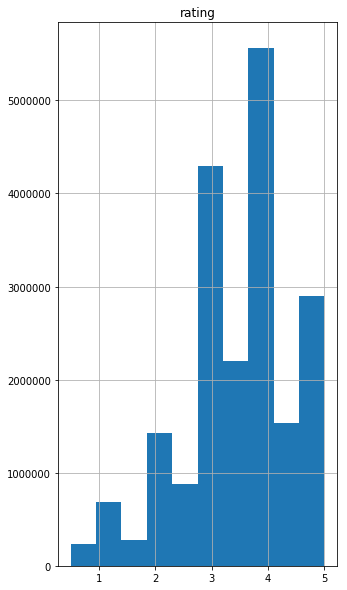

In [68]:
%matplotlib inline
import pandas as pd
ratings = pd.read_csv('./movielens/ratings.csv')
#ratings
ratings.hist(column = 'rating', figsize = (5,10))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(ratings['rating'] , ratings['movieId'])

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [ ]:
import pandas as pd
tags = pd.read_csv('./movielens/tags.csv')
#tags['tag']
tags.head(10)
movies = pd.read_csv('./movielens/movies.csv')
#movies = pd.read_csv()
#movies
#movies.hist(column ='movieId' , figsize = (15,10),layout =(1,2) )
import numpy as np
#df = pd.DataFrame({'col1':np.random.randn(100),
#                    'col2':np.random.randn(100)
#                  })
movies.plot(kind = 'bar' , figsize = (10,10))

In [ ]:
movies[['title' , 'movieId']].head(10)

In [18]:
ratings[-10:]

,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [26]:

tag_counts = movies['genres'].value_counts()
counts_pd = pd.DataFrame(tag_counts)
#counts_pd.head(10)
print(tag_counts)
#counts_pd['flag'] = counts_pd['tag'] < 3000
#pd.DataFrame(tag_counts)
#counts_pd

#counts_pd[10:].plot(kind = 'line' , figsize = (15,20))

# similar to count in python
# ******          syntax is dataframe[column].value_counts()                ********

Drama                                                  4520
Comedy                                                 2294
Documentary                                            1942
Comedy|Drama                                           1264
Drama|Romance                                          1075
Comedy|Romance                                          757
Comedy|Drama|Romance                                    605
Horror                                                  565
Crime|Drama                                             448
Drama|Thriller                                          426
Drama|War                                               399
Horror|Thriller                                         374
Crime|Drama|Thriller                                    304
Thriller                                                268
(no genres listed)                                      246
Western                                                 215
Action|Drama                            

In [2]:
%matplotlib inline
import pandas as pd
movies = pd.read_csv('./movies/movies.csv')
tag_counts['flag'] = tag_counts['tag'] > 3000
tag_counts.plot(kind='bar', figsize=(15,10))

FileNotFoundError: File b'./movies/movies.csv' does not exist

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [29]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating,timestamp
68,1,2021,4.0,1112485929
69,1,2100,4.0,1112485955
70,1,2118,4.0,1094786092
71,1,2138,4.0,1112485789
72,1,2140,4.0,1112485705
73,1,2143,4.0,1112485951
74,1,2173,4.0,1112485887
75,1,2174,4.0,1112485843
76,1,2193,4.0,1112485753
79,1,2288,4.0,1094786077


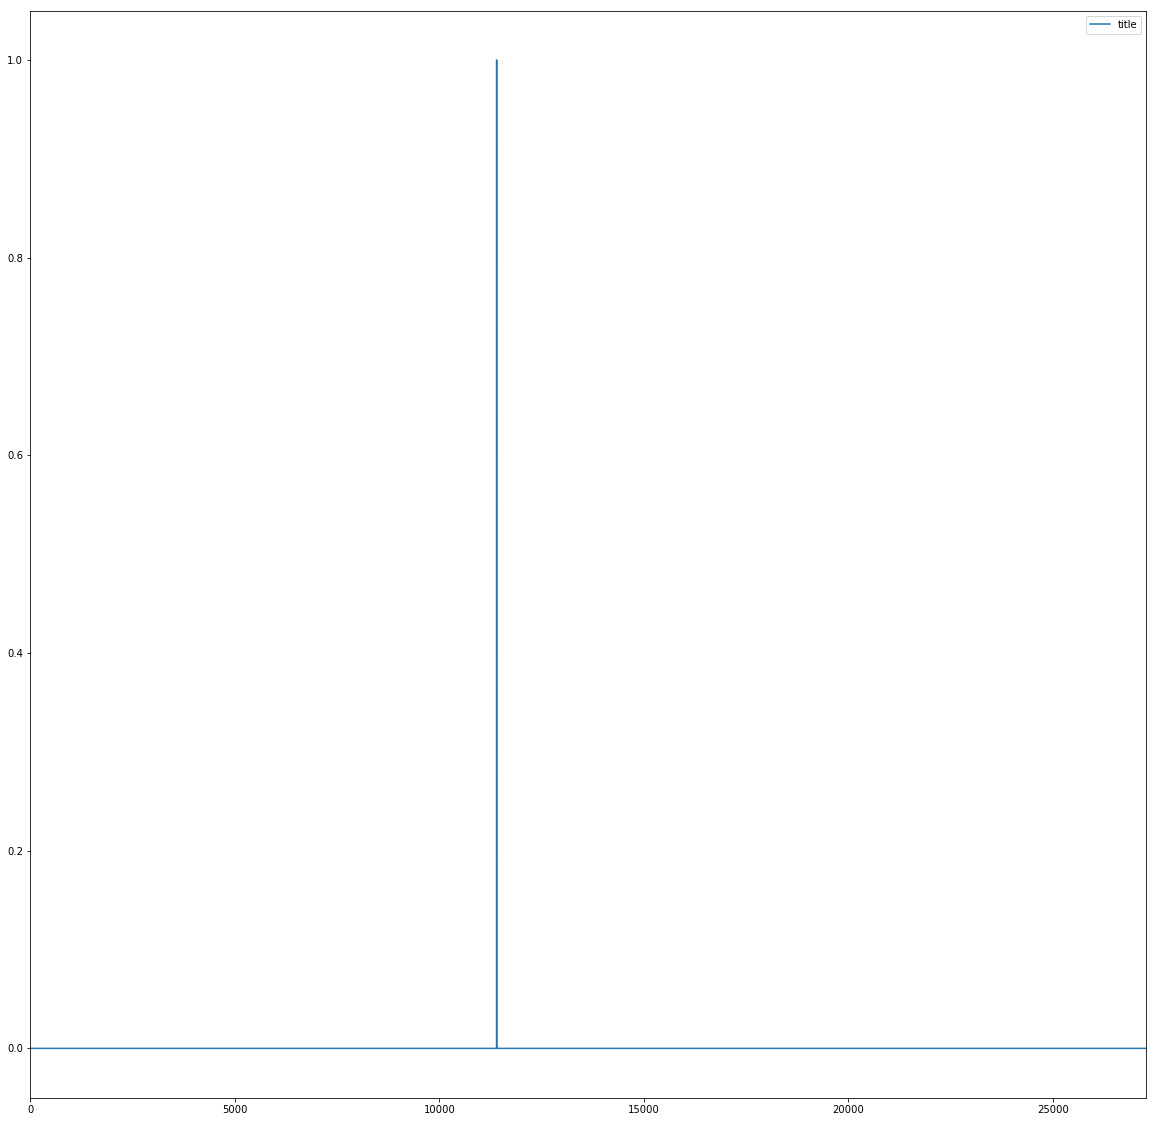

In [52]:
is_beauty = movies['title'].str.contains('Prestige')
movies[is_beauty]
df = pd.DataFrame(is_beauty)
#df
df.plot(kind = 'line' , figsize = (20,20))

In [53]:
movies[is_beauty].head(15)

,movieId,title,genres
11401,48780,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [54]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [55]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [4]:
tags = pd.read_csv('./movielens/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [14]:
avg_ratings = ratings.groupby('movieId',as_index = False).mean()
del avg_ratings['userId'],avg_ratings['timestamp']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [18]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner', sort = True)
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [20]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated].head()

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534


In [22]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [23]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [26]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [24]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [35]:
#movie_genres.head(15)
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [31]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [32]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [33]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [34]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [36]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [1]:
#tags.dtypes
del tags['timestamp']
tags

NameError: name 'tags' is not defined

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [46]:
tags.head(5)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [47]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

KeyError: 'timestamp'

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [48]:

tags['parsed_time'].dtype

KeyError: 'parsed_time'

In [49]:
tags.head(2)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [56]:
average_rating = ratings[['movieId','rating']].groupby('rating' , as_index = False).mean()
average_rating.tail()

,rating,movieId
5,3.0,6770.763264
6,3.5,14814.098703
7,4.0,8342.514461
8,4.5,14585.414824
9,5.0,6275.356017


In [58]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,NaN,NaN
rating,NaN,NaN


In [59]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating


In [60]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>